# Flux de Stockes

Le but de ce code est de résoudre un flux de Stockes dans une cavité carrée. On considère un liquide incompressible en deux dimensions dans des conditions où les forces visqueuses dominent celles liées à la convection/advection. On s'intéresse à la solution permanente de ce problème.

Un tel liquide suit la loi de Navier-Stockes,
\begin{equation}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u
\end{equation}
pour $u$ la vitesse du liquide, $t$ le temps, $\rho$ la densité et $p$ la pression. Ces considérations sont vérifiés pour des fluides dont le nombre de Reynolds $Re$ est beaucoup plus petit que 1. On peut réécrire l'équation de Navier-Stockes avec des grandeurs non-dimmensionnelle ($u^*$ et $p^*$)
\begin{equation}
Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*.
\end{equation}
Par question de lisibilité, les astérisques ne seront plus mentionnées par la suite. En faisant tendre $Re$ vers 0, et en prenant le rotationnel de cette équation, on a
\begin{equation}
0 = \nabla \times \left( -\nabla p + \nabla^2 u\right)
\end{equation}
Comme le rotationnel d'un gradient est nul, en posant la vorticité $\omega = \nabla \times u = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}$, on a finalement
\begin{equation}
\nabla^2 \omega = 0.
\end{equation}

En posant la fonction de courant $\psi$ telle que $u = \frac{\partial \psi}{\partial y}$ et $v = - \frac{\partial \psi}{\partial x}$, l'équation suivante vient compléter la description de ce problème.
\begin{equation}
\nabla^2 \psi =  -\omega
\end{equation}

## Conditions expérimentales

Le côté supérieur de la boîte carrée contenant le liquide se déplace à vitesse constance $u = 1$. Les trois autres côtés sont au repos. On considère que le liquide ne glisse pas sur les parois. De plus, $\psi = 0$ sur tous les bords.

## Discrétisation
Pour tout champ scalaire $\phi(x,y)$, le développement au deuxième ordre de son laplacien est
\begin{equation}
\nabla^2 \phi(x,y) = \frac{\phi(x-dx,y) - 2\phi(x,y) + \phi(x+dx,y)}{dx^2} + \frac{\phi(x,y-dy) - 2\phi(x,y) + \phi(x,y+dy)}{dy^2} + \mathcal{O}\left(dx^2\right) + \mathcal{O}\left(dy^2\right).
\end{equation}

La version discrète est donc
\begin{equation}
\nabla^2 \phi_{i,j} \approx \frac{\phi_{i-1,j} - 2\phi_{i,j} + \phi_{i+1,j}}{\Delta x^2} + \frac{\phi_{i,j-1} - 2\phi_{i,j} + \phi_{i,j+1}}{\Delta y^2}.
\end{equation}
En prenant $\Delta x = \Delta y$ deux équations du problème deviennent
\begin{equation}
\frac{\omega_{i-1,j} + \omega_{i+1,j} + \omega_{i,j-1} + \omega_{i,j+1} - 4\omega_{i,j}}{\Delta x^2} = 0
\end{equation}
et
\begin{equation}
\frac{\psi_{i-1,j} + \psi_{i+1,j} + \psi_{i,j-1} + \psi_{i,j+1} - 4\psi_{i,j}}{\Delta x^2} = -\omega_{i,j}.
\end{equation}
On résout pour $\omega_{i,j}$ et $\psi_{i,j}$
\begin{equation}
\omega_{i,j} = \frac{1}{4}\left(\omega_{i-1,j} + \omega_{i+1,j} + \omega_{i,j-1} + \omega_{i,j+1}\right),
\end{equation}
\begin{equation}
\psi_{i,j} = \frac{1}{4}\left(\psi_{i-1,j} + \psi_{i+1,j} + \psi_{i,j-1} + \psi_{i,j+1} + \Delta x^2\omega_{i,j}\right).
\end{equation}

## Conditions aux bords
Les conditions aux bords pour $\omega$ ne sont pas données dans l'énoncé, mais peuvent être déduite par les conditions sur les dérivées de $\psi$. Cependant, $\psi$ n'est pas défini à l'extérieur de la boîte. Sur toutes les surfaces, comme les parois sont solides, il n'y a pas de vitesse normale. Pour les trois bords au repos, il n'y a pas de vitesse parallèle au bord non plus.

Pour cela, on utilise la discrétisation au troisième ordre pour $\frac{\partial\omega}{\partial y}$,
$$
\left.\frac{\partial \omega}{\partial y}\right|_j = \frac{2\omega_{j+1} + 3\omega_j - 6\omega_{j-1} + \omega_{j-2}}{6 \Delta y}.
$$
En utilisant l'équation de Laplace, avec les dérivées secondes parallèles au bord nulles, on a finalement
$$
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3u}{\Delta y}\quad \text{sur le bord supérieur,}\\
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2})\quad \text{sur le bord inférieur,}\\
\omega_{i,j} = -\frac{1}{2 \Delta x^2} (8\psi_{i\pm1, j} - \psi_{i\pm2, j})\quad \text{sur les bords latéraux.}
$$

## Méthode de relaxation

On cherche la solution stationnaire du problème, en connaissant les conditions aux bords. Pour cela, on relaxe le système, c'est-à-dire on calcule les nouvelles valeurs des champs $\omega$ et $\psi$ en résolvant les équations à l'aide des anciennes jusqu'à ce que la différence entre deux itérations soit suffisamment petite. Trois méthodes différentes sont comparées. La première, celle de Jacobi, utilise uniquement les anciennes valeurs pour calculer les laplaciens. Les exposants indiquent le nombre d'itération.
\begin{equation}
\omega_{i,j}^{n+1} = \frac{1}{4}\left(\omega_{i-1,j}^n + \omega_{i+1,j}^n + \omega_{i,j-1}^n + \omega_{i,j+1}^n\right),
\end{equation}
\begin{equation}
\psi_{i,j}^{n+1} = \frac{1}{4}\left(\psi_{i-1,j}^n + \psi_{i+1,j}^n + \psi_{i,j-1}^n + \psi_{i,j+1}^n + \Delta x^2\omega_{i,j}^{n+1}\right).
\end{equation}

La seconde méthode est celle de Gauss-Seidel. On profite des valeurs déjà calculée:
\begin{equation}
\omega_{i,j}^{n+1} = \frac{1}{4}\left(\omega_{i-1,j}^{n+1} + \omega_{i+1,j}^n + \omega_{i,j-1}^{n+1} + \omega_{i,j+1}^n\right),
\end{equation}
\begin{equation}
\psi_{i,j}^{n+1} = \frac{1}{4}\left(\psi_{i-1,j}^{n+1} + \psi_{i+1,j}^n + \psi_{i,j-1}^{n+1} + \psi_{i,j+1}^n + \Delta x^2\omega_{i,j}^{n+1}\right).
\end{equation}

Finalement, la méthode SOR (*successive over-relaxation method*) utilise une combinaison linéaire des anciennes et nouvelles valeurs, avec $0<\rho<2$ le paramètre de relaxation,
\begin{equation}
\omega_{i,j}^{n+1} = \left(1-\rho\right)\omega_{i,j}^n + \frac{\rho}{4}\left(\omega_{i-1,j}^{n+1} + \omega_{i+1,j}^n + \omega_{i,j-1}^{n+1} + \omega_{i,j+1}^n\right),
\end{equation}
\begin{equation}
\psi_{i,j}^{n+1} = \left(1-\rho\right)\psi_{i,j}^n + \frac{\rho}{4}\left(\psi_{i-1,j}^{n+1} + \psi_{i+1,j}^n + \psi_{i,j-1}^{n+1} + \psi_{i,j+1}^n + \Delta x^2\omega_{i,j}^{n+1}\right).
\end{equation}
On remarque que la méthode de Gauss-Seidel et celle SOR sont les même si $\rho = 1$.

In [1]:
import numpy
import numba
from numba import jit
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams,cm

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Conditions numériques
La boîte est carrée, de côté 1 parcouru par une grille $41\times41$. La précision requise pour l'arrêt des calcul est la norme L1 de la différence entre 2 itérations consécutives soit plus petite que $10^{-6}$.

In [2]:
nx = 41
ny = nx

l = 1.
h = 1.

dx = l/(nx-1)
dy = dx

l1_target = 1e-6

x  = numpy.linspace(0,l,nx)
y  = numpy.linspace(0,h,nx)

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def Jacobi(l1_target, nx, dx):
    '''Solves the Stockes equation using the Jacobi method
    
    Parameters:
    ----------
    l1_target: float
        Stopping criterion
    nx: integer
        Mesh number in x and y directions
    dx: float
        Mesh spacing in x and y directions
        
    Returns:
    -------
    psi: 2D array of float
        Streamfunction distribution after relaxation
    iterations: integer
        Number of iteratition needed
    l1norm_list : 1D array of float
        l1 norm between two iterations
    '''
    omega = numpy.zeros((nx,nx))
    psi = numpy.zeros((nx,nx))
    psi_o = numpy.empty_like(psi)
    omega_o = numpy.empty_like(omega)
    l1norm_list = numpy.zeros(5000)
    norm = 1
    iteration = 0

    while norm > l1_target:
        psi_o = psi.copy()
        omega_o = omega.copy()
        
        omega[1:-1,1:-1] = (omega_o[1:-1,2:] + omega_o[1:-1,:-2] + \
                            omega_o[2:,1:-1] + omega_o[:-2,1:-1])/4
        #up and down BC
        omega[-1,:] = -(8*psi[-2,:]-psi[-3,:])/(2*dx**2)-3/dx
        omega[0,:] = -(8*psi[1,:]-psi[2,:])/(2*dx**2)
        
        #left and right BC
        omega[:,-1] = -(8*psi[:,-2]-psi[:,-3])/(2*dx**2)
        omega[:,0] = -(8*psi[:,1]-psi[:,2])/(2*dx**2)  
     
        psi[1:-1,1:-1] = ((psi_o[1:-1,2:]+psi_o[1:-1,:-2]) +\
                        (psi_o[2:,1:-1] + psi_o[:-2,1:-1]) +\
                         omega[1:-1,1:-1]*dx**2)/4
          
            
        l1norm_omega = L1norm(omega,omega_o)
        l1norm_psi = L1norm(psi,psi_o)
        
        norm = numpy.maximum(l1norm_omega,l1norm_psi)
        l1norm_list[iteration-1] = norm
        iteration += 1
     
    return psi, iteration, l1norm_list

In [5]:
@jit
def SOR(l1_target, nx, dx,rp):
    '''Solves the Stockes equation using the SOR method
    
    Parameters:
    ----------
    l1_target: float
        Stopping criterion
    nx: integer
        Mesh number in x direction
    dx: float
        Mesh spacing in x and y directions
    rp: float
        Relaxation parameter
        
    Returns:
    -------
    psi: 2D array of float
        Streamfunction distribution after relaxation
    iterations: integer
        Number of iteratition needed
    l1norm_list : 1D array of float
        l1 norm between two iterations
    '''
    omega = numpy.zeros((nx,nx))
    psi = numpy.zeros((nx,nx))
    omega_o = numpy.empty_like(omega)
    psi_o = numpy.empty_like(psi)
    norm = l1_target+1
    iteration = 0
    
    l1norm_list = numpy.zeros(2200)
    
    while norm > l1_target:
        omega_o = omega.copy()
        psi_o = psi.copy()
        omega[-1,:] = -(8*psi[-2,:]-psi[-3,:])/(2*dx**2)-3/dx
        omega[0,:] = -(8*psi[1,:]-psi[2,:])/(2*dx**2)
        omega[:,-1] = -(8*psi[:,-2]-psi[:,-3])/(2*dx**2)
        omega[:,0] = -(8*psi[:,1]-psi[:,2])/(2*dx**2) 
        
        for i in range(1,nx-1):
            for j in range(1,nx-1):
                omega[i,j] = (1-rp)*omega[i,j] + rp*.25*(omega[i-1,j] + omega[i+1,j] + omega[i,j-1] + omega[i,j+1])
                psi[i,j] = (1-rp)*psi[i,j] + rp*.25 * (psi[i,j+1]+psi[i,j-1] + psi[i+1,j] + psi[i-1,j] + omega[i,j]*dx**2)
                
        l1norm_omega = L1norm(omega,omega_o)
        l1norm_psi = L1norm(psi,psi_o)
        norm = numpy.maximum(l1norm_omega,l1norm_psi)
        l1norm_list[iteration-1] = norm
        iteration += 1
     
    return psi, iteration, l1norm_list

In [6]:
def GaussSeidel(l1_target, nx, dx):
    '''Solves the Stockes equation using the Gauss-Seidel method
    
    Parameters:
    ----------
    l1_target: float
        Stopping criterion
    nx: integer
        Mesh number in x direction
    dx: float
        Mesh spacing in x and y directions
        
    Returns:
    -------
    psi: 2D array of float
        Streamfunction distribution after relaxation
    iterations: integer
        Number of iteratition needed
    l1norm_list : 1D array of float
        l1 norm between two iterations
    '''
    return SOR(l1_target, nx, dx,1.)

Afin de garantir une utilisation optimale de la méthode SOR, on cherche le meilleur paramètre de relaxation $\rho$ en scannant les valeurs entre 1 et 2. Comme le nombre d'itération explose si $\rho$ est trop proche de 2, on ne parcourt que les valeurs entre 1 et 1.46 Ce code est assez lent puisqu'il teste l’algorithme SOR pour plusieurs valeurs de $\rho$.

In [7]:
def BestRP(rp_min, rp_max,n_tests, nx, dx):
    '''Finds the best relaxation parameter (RP) for SOR solver
    
    Parameters:
    ----------
    rp_min: float
        inferior boundry of the tested RP interval
    rp_max: float
        superior boundry of the tested RP interval
    n_tests: integer
        number of value in [rp_min,rp_max) for RP tested
        
    Returns:
    -------
    best_rp: float
        best computed RP
    rp_list: 1D float array
        list of tested RP
    iteration: 1D int array
        number of iteration needed for each RP
    '''
    
    rp_list=numpy.zeros(n_tests)
    iteration=numpy.zeros(n_tests, int)
    delta = (rp_max-rp_min)/n_tests
    for i in range (0,n_tests):
        rp_list[i] = rp_min + i*delta
        a, iteration[i], b = SOR(l1_target, nx, dx,rp_list[i])
        if i>0:
            if iteration[i] > iteration[i-1]:
                best_rp = rp_list[i-1]
            print (i,'relaxation parameter =', rp_list[i], ':', iteration[i], 'iterations')
    return best_rp,rp_list, iteration

In [8]:
rp,rp_list, iteration = BestRP(1.,1.46,25, nx, dx)
#rp = 1.4232

1 relaxation parameter = 1.0184 : 2047 iterations
2 relaxation parameter = 1.0368 : 1977 iterations
3 relaxation parameter = 1.0552 : 1909 iterations
4 relaxation parameter = 1.0736 : 1844 iterations
5 relaxation parameter = 1.092 : 1781 iterations
6 relaxation parameter = 1.1104 : 1719 iterations
7 relaxation parameter = 1.1288 : 1660 iterations
8 relaxation parameter = 1.1472 : 1603 iterations
9 relaxation parameter = 1.1656 : 1548 iterations
10 relaxation parameter = 1.184 : 1494 iterations
11 relaxation parameter = 1.2024 : 1442 iterations
12 relaxation parameter = 1.2208 : 1391 iterations
13 relaxation parameter = 1.2392 : 1342 iterations
14 relaxation parameter = 1.2576 : 1294 iterations
15 relaxation parameter = 1.276 : 1248 iterations
16 relaxation parameter = 1.2944 : 1202 iterations
17 relaxation parameter = 1.3128 : 1158 iterations
18 relaxation parameter = 1.3312 : 1115 iterations
19 relaxation parameter = 1.3496 : 1074 iterations
20 relaxation parameter = 1.368 : 1033 iter

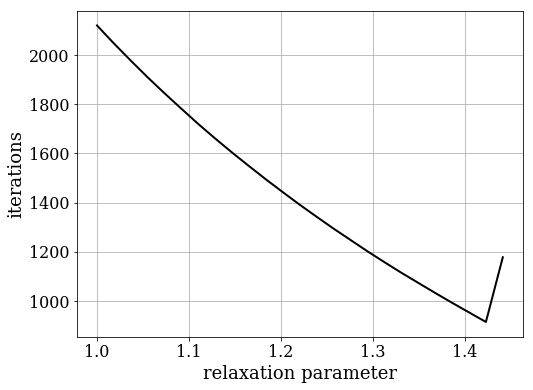

In [9]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'relaxation parameter', fontsize=18)
pyplot.ylabel(r'iterations', fontsize=18)
pyplot.plot(rp_list, iteration, lw=2, color='k');

On remarque que la valeur du paramètre de relaxation diminue régulièrement jusqu'à $\rho = 1.4232$ puis remonte abruptement. Pour la suite, la valeur utilisée sera cette dernière.

## Comparaison des algorithmes
On s'intéresse maintenant aux résultats des trois méthodes implémentées ci-dessus.

In [10]:
psi_J, iteration_J, l1norm_list_J = Jacobi(l1_target, nx, dx)

In [11]:
psi_GS, iteration_GS, l1norm_list_GS  = GaussSeidel(l1_target, nx, dx)

In [12]:
psi_SOR, iteration_SOR, l1norm_list_SOR  = SOR(l1_target, nx, dx,rp)

In [13]:
def plot(psi, x, y, title):
    '''Plots the field
    
    Parameters:
    ----------
    psi: 2D array of float
        Field to plot
    x: 1D array of float
        x cordinates correspondig to psi
    y: 1D array of float
        y cordinates correspondig to psi
        
    Returns:
    -------
    '''
    fig0, ax0 = pyplot.subplots(figsize=(8,7))
    cs = ax0.contourf(x, y, psi,20,cmap=cm.viridis)
    cbar = fig0.colorbar(cs)
    pyplot.title(title)
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.show()

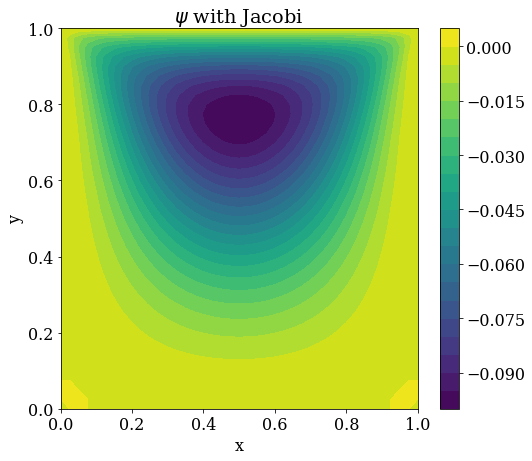

In [14]:
plot(psi_J,x,y,'$\psi$ with Jacobi')

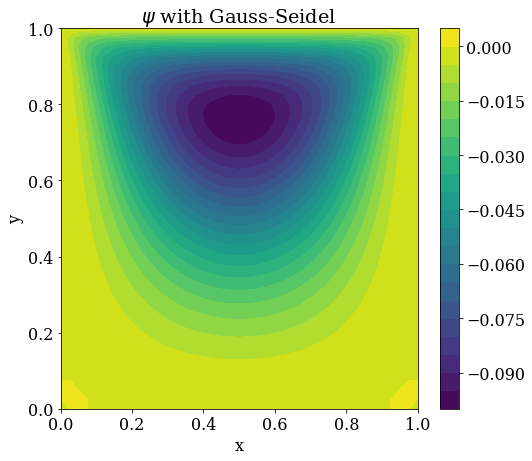

In [15]:
plot(psi_GS, x, y, '$\psi$ with Gauss-Seidel')

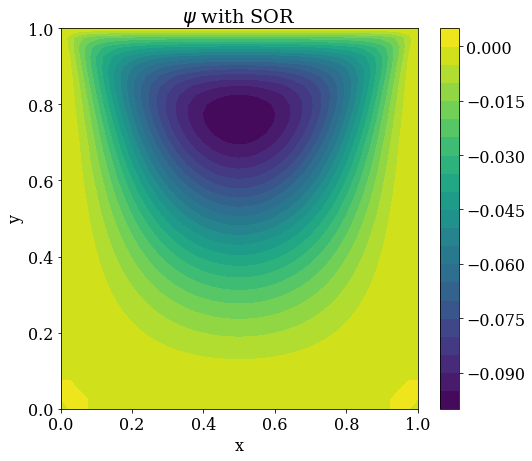

In [16]:
plot(psi_GS, x, y, '$\psi$ with SOR')

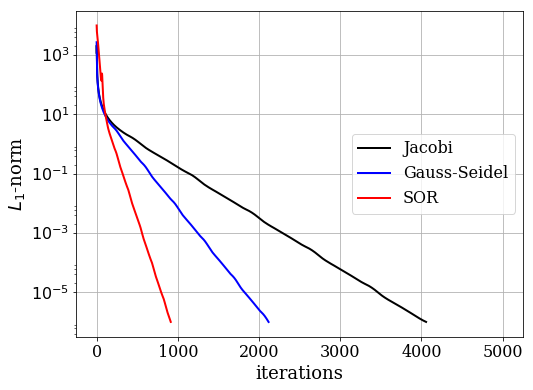

In [17]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_1$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(l1norm_list_J)), l1norm_list_J, lw=2, color='k', label='Jacobi');
pyplot.semilogy(numpy.arange(len(l1norm_list_GS)), l1norm_list_GS, lw=2, color='b', label='Gauss-Seidel');
pyplot.semilogy(numpy.arange(len(l1norm_list_SOR)), l1norm_list_SOR, lw=2, color='r', label='SOR');
pyplot.legend(fontsize=16);

On remarque heureusement que les trois méthodes convergent vers la même solution, mais à des vitesses (nombre d'itération) très différentes. Comme attendu, SOR est le meilleur, il est deux fois plus rapide que Gauss-Seidel et même quatre fois plus rapide que Jacobi. On remarque toutefois que pour les premières itérations SOR est moins bon que les deux autres, qui suivent la même courbe. Un autre paramètre de relaxation plus petit semble être plus adapté au début de l'itération.

## Interprétation physique
Il est plus facile de comprendre physiquement la solution du problème en regardant le champ de vitesse du fluide. En effet, c'est une grandeur plus intuitive que la fonction de courant.

In [18]:
def velocity(psi):
    '''Compute the horizontal (u) and vertical (v) component of the velocity field
    
    Parameters:
    ----------
    psi: 2D array of float
        Streamfunction distribution
        
    Returns:
    -------
    u: 2D array of float
        x component of the velocity field
    v: 2D array of float
        y component of the velocity field
    '''
    u = numpy.zeros((nx-2,nx-2))
    v = numpy.zeros((nx-2,nx-2))

    
    u[:,:] = (psi[2:,1:-1] - psi[:-2, 1:-1])/(2*dx)
    v[:,:] = -(psi[1:-1,2:] - psi[1:-1,:-2])/(2*dx)
    return u,v

In [19]:
u,v = velocity(psi_J)

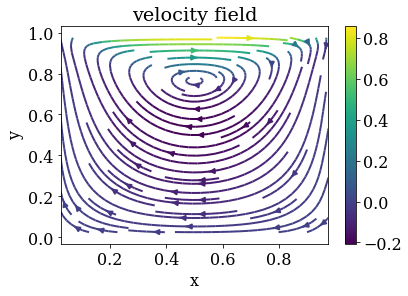

In [20]:
fig0, ax0 = pyplot.subplots()
strm = ax0.streamplot(x[1:-1],y[1:-1], u, v, color=u, linewidth=2)
fig0.colorbar(strm.lines)
pyplot.title('velocity field')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

La figure ci-dessus représente le champ de vitesse à l'intérieur de la boîte (c'est à dire sans les bords). Ces résultats confirment l'intuition disant que le fluide déplace sur une boucle dans le sens négatif. On remarque aussi l'anti-symétrie du champ de vitesse selon l'axe $x=0.5$.
